In [ ]:
# Dependencies

import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Models
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.DataFrame()

for i in range(1, 6):

    _ = pd.read_csv(f"Data\\generatedValues_{i}.csv", index_col = False)
    df = df._append(_)

df

,l1,l2,w1,w2,r,fl,fw,area
0,0.020284,0.048383,0.003582,0.002726,0.006040,0.017785,0.003615,20.676899
1,0.024529,0.039194,0.002883,0.002874,0.007601,0.015531,0.002076,6.340176
2,0.024610,0.048019,0.002725,0.001799,0.007152,0.018210,0.003706,20.821830
3,0.024056,0.037307,0.003347,0.003611,0.006467,0.020129,0.003900,0.000000
4,0.021654,0.036766,0.003078,0.001569,0.007872,0.016591,0.002246,35.442513
...,...,...,...,...,...,...,...,...
15,0.024624,0.039053,0.002249,0.002626,0.006722,0.017701,0.002830,30.747079
16,0.019789,0.046050,0.001902,0.003987,0.004831,0.017148,0.003545,35.268473
17,0.021608,0.037118,0.001537,0.002290,0.005480,0.015569,0.002972,19.573054
18,0.023061,0.044222,0.003569,0.002436,0.006134,0.017197,0.002618,32.280283


In [9]:
# Apply log transformation
df['log_area'] = np.log1p(df['area'])

X = df.drop(['log_area','area'], axis = 1)
y = df['log_area']

print(X.describe(), "\n", y.describe)

               l1          l2          w1          w2           r          fl  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.022168    0.042780    0.002766    0.002641    0.006058    0.018634   
std      0.001663    0.004351    0.000752    0.000701    0.001169    0.002232   
min      0.019046    0.035082    0.001506    0.001502    0.004058    0.015001   
25%      0.020831    0.039366    0.002011    0.002119    0.004997    0.016692   
50%      0.021869    0.042789    0.002796    0.002614    0.006071    0.018245   
75%      0.023560    0.046690    0.003404    0.003194    0.007104    0.020641   
max      0.024988    0.049974    0.003968    0.003987    0.007999    0.022486   

               fw  
count  100.000000  
mean     0.003006  
std      0.000542  
min      0.002040  
25%      0.002600  
50%      0.002953  
75%      0.003446  
max      0.003979   
 <bound method NDFrame.describe of 0     3.076247
1     1.993363
2     3.082911
3     0.0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

estimators = [

    ('rf', RandomForestRegressor(n_estimators = 100, random_state = 42)),
    ('svr', SVR(kernel = 'poly', degree = 10, epsilon= 0.01, gamma='scale')),
    ('xgbr', XGBRegressor(n_estimators = 100, random_state = 42))

]

stack = StackingRegressor(estimators = estimators, final_estimator = Ridge())

stack.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('svr',
                               SVR(degree=10, epsilon=0.01, kernel='poly')),
                              ('xgbr',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge())

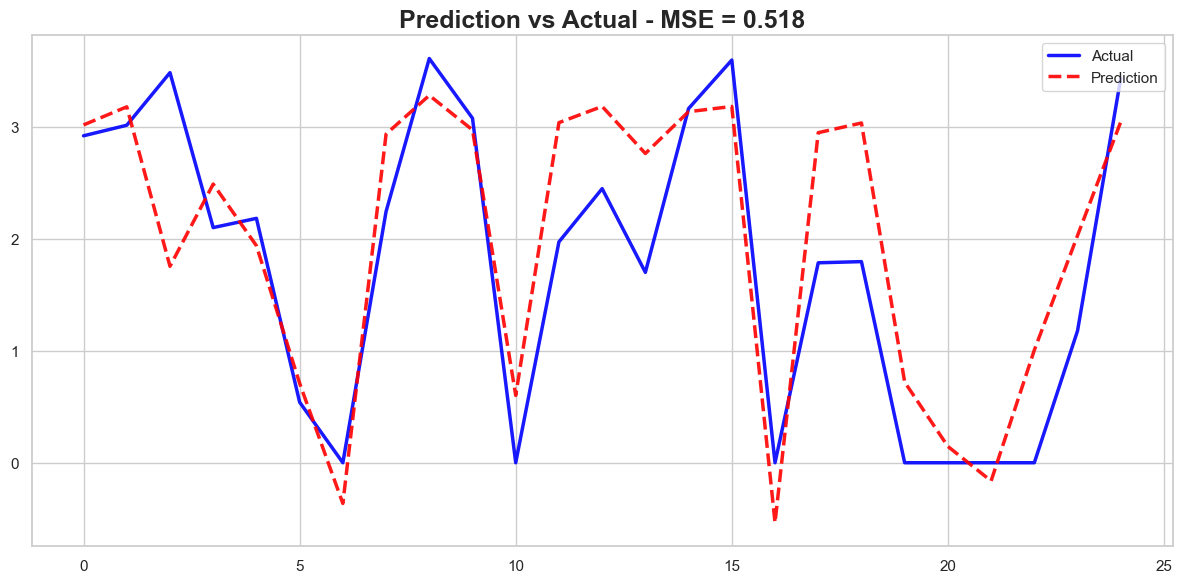

In [16]:
pred = stack.predict(X_test)

mse = mean_squared_error(pred, y_test)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(np.array(y_test).reshape(-1), label='Actual', color='blue', linewidth=2.5, alpha=0.9, linestyle='-')
plt.plot(pred.reshape(-1), label='Prediction', color='red', linewidth=2.5, alpha=0.9, linestyle='--')

plt.title(f'Prediction vs Actual - MSE = {mse:.3f}', fontsize=18, weight='bold')

plt.legend(loc = 'upper right')

plt.tight_layout()

plt.show()